<a href="https://colab.research.google.com/github/rakshaa2000/30-Days-of-ML/blob/main/Air_Quality/Air_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Air Quality Prediction**

This notebook predicts the air quality using regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving AirQualityUCI.csv to AirQualityUCI.csv


In [4]:
df = pd.read_csv("AirQualityUCI.csv", sep=";",decimal=',')
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [5]:
df.dropna(axis=0, how= 'all', inplace=True)
df.dropna(axis=1, inplace=True)

In [6]:
df.replace(to_replace= -200, value= np.NaN, inplace= True)
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [7]:
df.fillna(df.mean(), inplace= True)

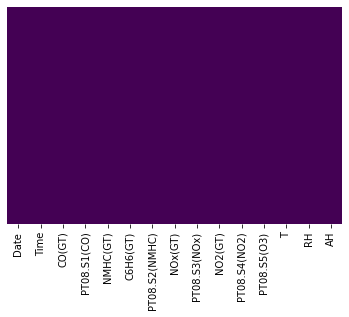

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
df.loc[:,'Date']=df['Date']
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [11]:
from datetime import datetime
Date= []
for i in df['Date']:
    Date.append(datetime.strptime(i,'%d/%m/%Y'))
df.dtypes

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

In [12]:
date=pd.Series(Date)
df['Date']=pd.to_numeric(date)

In [13]:
df['Date']=df['Date'].astype(float)
df.dtypes

Date             float64
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

In [14]:
df.loc[:,'Time']=df['Time']

In [15]:
from datetime import datetime
Time= []
for i in df['Time']:
    Time.append(datetime.strptime(i,'%H.%M.%S'))
df.dtypes

Date             float64
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

In [17]:
time=pd.Series(Time)
df['Time']=pd.to_numeric(time)

In [18]:
df['Time']=df['Time'].astype(float)
df.dtypes

Date             float64
Time             float64
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

In [20]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,1.078877e+18,-2.208924e+18,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,1.078877e+18,-2.208920e+18,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,1.078877e+18,-2.208917e+18,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,1.078877e+18,-2.208913e+18,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.078877e+18,-2.208910e+18,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [22]:
from sklearn.preprocessing import MinMaxScaler

num = df.keys()
scaler = MinMaxScaler()
scaler.fit(df[num])
df[num] = scaler.transform(df[num])

In [23]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,0.0,0.782609,0.211864,0.511845,0.120981,0.185535,0.362097,0.111036,0.310885,0.328402,0.513040,0.454822,0.333333,0.499371,0.280066
1,0.0,0.826087,0.161017,0.463029,0.088832,0.146226,0.312398,0.068382,0.360864,0.266272,0.453237,0.326238,0.326882,0.484277,0.264282
2,0.0,0.869565,0.177966,0.541996,0.068528,0.139937,0.303659,0.087339,0.346463,0.331361,0.451439,0.370547,0.296774,0.563522,0.276352
3,0.0,0.913043,0.177966,0.523331,0.061760,0.143082,0.308575,0.115098,0.326133,0.355030,0.464478,0.426586,0.277419,0.638994,0.294190
4,0.0,0.956522,0.127119,0.448672,0.037225,0.100629,0.247406,0.087339,0.373994,0.337278,0.422212,0.386186,0.281720,0.633962,0.295216


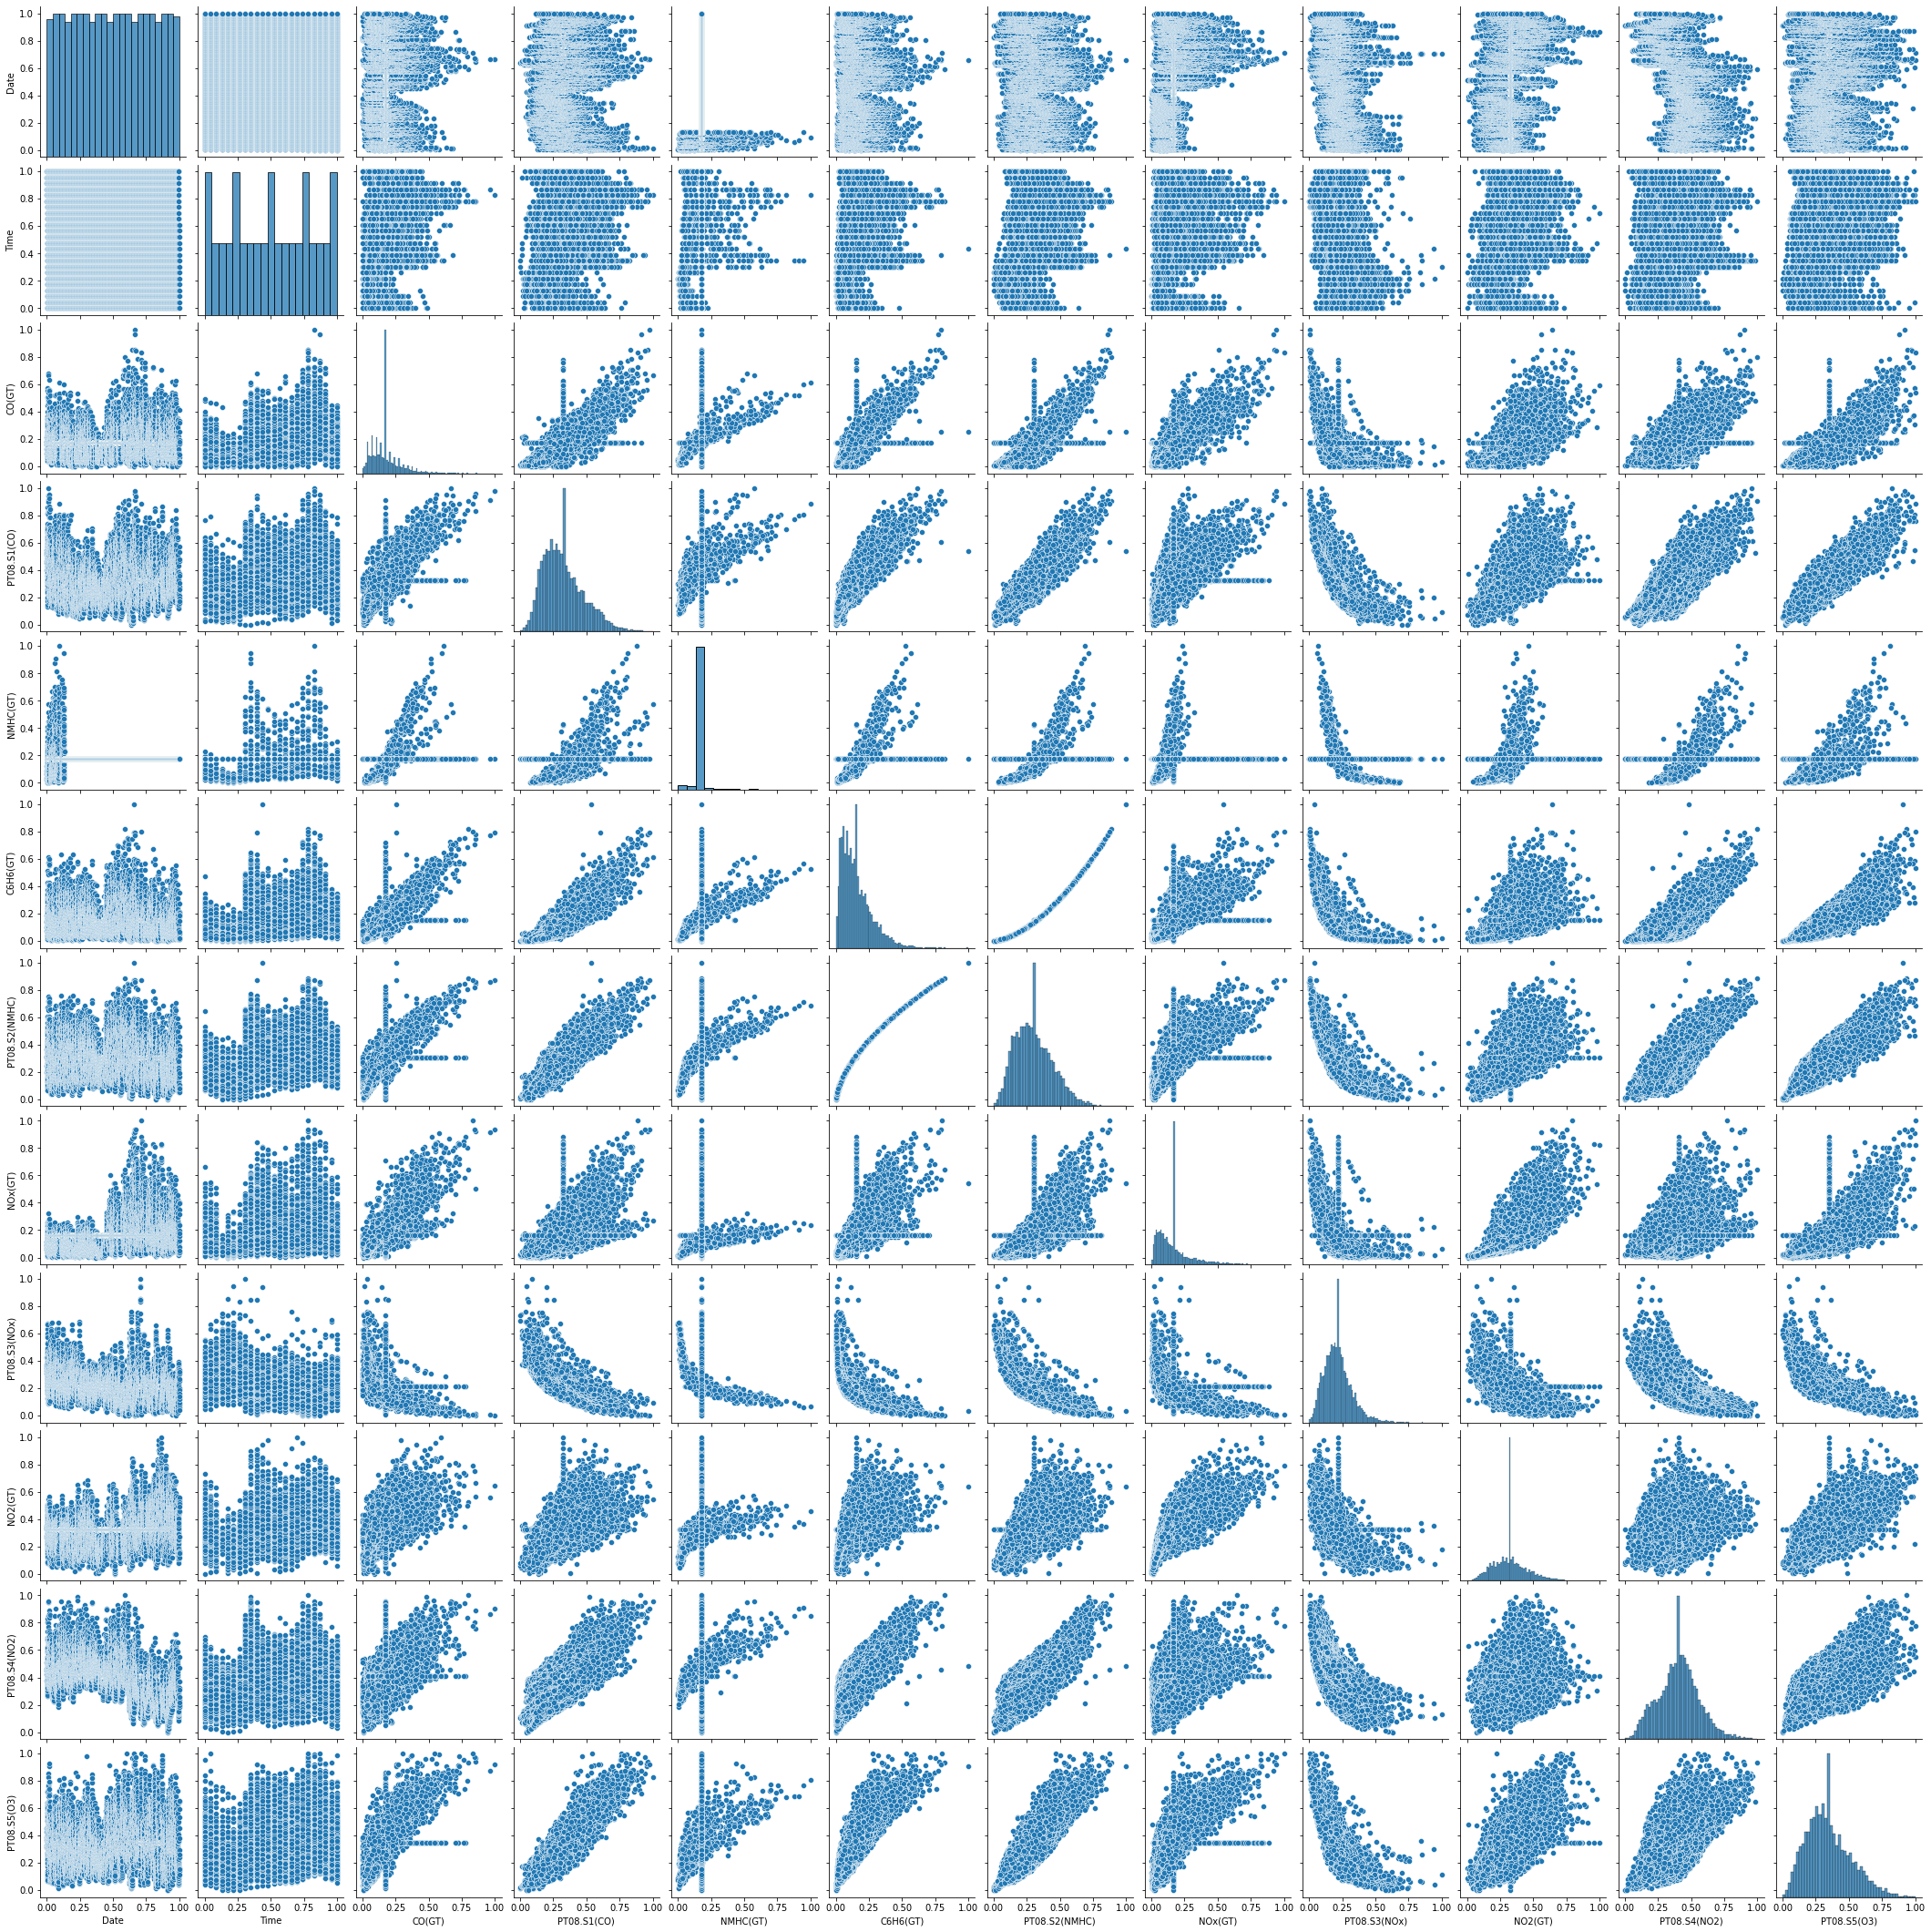

In [24]:
sns.pairplot(df[["Date","Time","CO(GT)","PT08.S1(CO)","NMHC(GT)","C6H6(GT)","PT08.S2(NMHC)","NOx(GT)","PT08.S3(NOx)","NO2(GT)","PT08.S4(NO2)","PT08.S5(O3)"]],diag_kind = "auto")

In [25]:
features=df
features=features.drop('C6H6(GT)',axis=1)

In [26]:
target=df['C6H6(GT)']

In [27]:
df1=df.corr('pearson')
df1

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date,1.000000,-0.003249,0.041514,-0.003232,0.008010,-0.064007,-0.083633,0.401280,-0.251775,0.349315,-0.517637,0.103508,-0.450032,0.212245,-0.310146
Time,-0.003249,1.000000,0.323944,0.321097,0.102758,0.336890,0.380964,0.200493,-0.316828,0.327673,0.216572,0.239880,0.202272,-0.289543,-0.018233
CO(GT),0.041514,0.323944,1.000000,0.773394,0.289975,0.812361,0.795578,0.762273,-0.613877,0.646349,0.558232,0.759027,0.020257,0.043198,0.043274
PT08.S1(CO),-0.003232,0.321097,0.773394,1.000000,0.278282,0.883795,0.892964,0.615941,-0.771938,0.562843,0.682881,0.899324,0.048627,0.114606,0.135324
NMHC(GT),0.008010,0.102758,0.289975,0.278282,1.000000,0.281928,0.279761,0.098180,-0.261997,0.156510,0.232979,0.240592,0.066782,-0.052784,0.037173
C6H6(GT),-0.064007,0.336890,0.812361,0.883795,0.281928,1.000000,0.981950,0.616801,-0.735744,0.535919,0.765731,0.865689,0.198956,-0.061681,0.167972
PT08.S2(NMHC),-0.083633,0.380964,0.795578,0.892964,0.279761,0.981950,1.000000,0.601773,-0.796703,0.561180,0.777254,0.880578,0.241373,-0.090380,0.186933
NOx(GT),0.401280,0.200493,0.762273,0.615941,0.098180,0.616801,0.601773,1.000000,-0.563270,0.763074,0.205485,0.688205,-0.235636,0.192587,-0.126868
PT08.S3(NOx),-0.251775,-0.316828,-0.613877,-0.771938,-0.261997,-0.735744,-0.796703,-0.563270,1.000000,-0.569479,-0.538468,-0.796569,-0.145112,-0.056740,-0.232017
NO2(GT),0.349315,0.327673,0.646349,0.562843,0.156510,0.535919,0.561180,0.763074,-0.569479,1.000000,0.140655,0.629443,-0.165466,-0.080569,-0.291392


In [28]:
abs(df1['C6H6(GT)']).sort_values(ascending=False)

C6H6(GT)         1.000000
PT08.S2(NMHC)    0.981950
PT08.S1(CO)      0.883795
PT08.S5(O3)      0.865689
CO(GT)           0.812361
PT08.S4(NO2)     0.765731
PT08.S3(NOx)     0.735744
NOx(GT)          0.616801
NO2(GT)          0.535919
Time             0.336890
NMHC(GT)         0.281928
T                0.198956
AH               0.167972
Date             0.064007
RH               0.061681
Name: C6H6(GT), dtype: float64

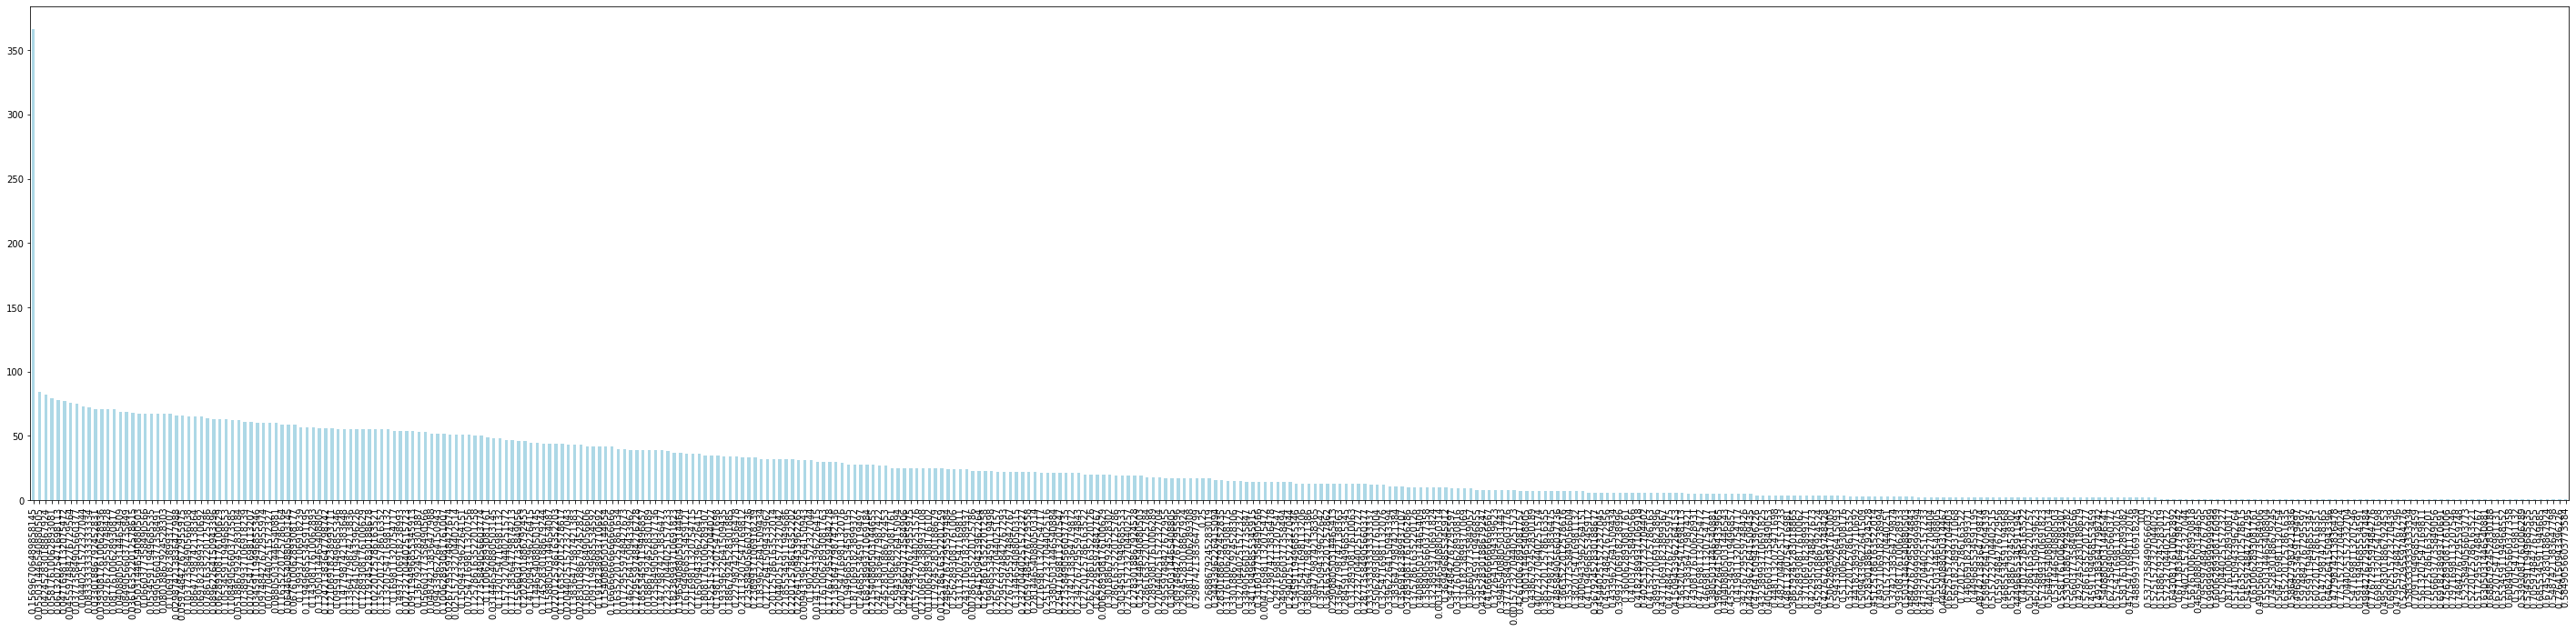

In [29]:
df['C6H6(GT)'].value_counts().plot(kind='bar', color='lightblue', figsize=(50,10))

In [30]:
features=features.drop('Date',axis=1)
features=features.drop('Time',axis=1)
features=features.drop('T',axis=1)
features=features.drop('RH',axis=1)
features=features.drop('AH',axis=1)
features=features.drop('NMHC(GT)',axis=1)
features.head()

,CO(GT),PT08.S1(CO),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3)
0,0.211864,0.511845,0.362097,0.111036,0.310885,0.328402,0.513040,0.454822
1,0.161017,0.463029,0.312398,0.068382,0.360864,0.266272,0.453237,0.326238
2,0.177966,0.541996,0.303659,0.087339,0.346463,0.331361,0.451439,0.370547
3,0.177966,0.523331,0.308575,0.115098,0.326133,0.355030,0.464478,0.426586
4,0.127119,0.448672,0.247406,0.087339,0.373994,0.337278,0.422212,0.386186


In [31]:
features=features.values
target=target.values

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25)

Predicted values: [0.39650088 0.17595168 0.02737237 ... 0.06189292 0.06323375 0.3226208 ]
R^2 score for liner regression:  0.9743521585765479


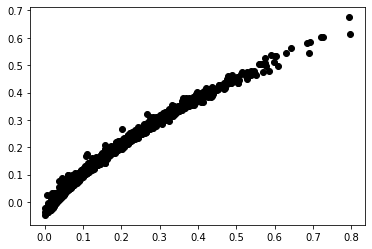

In [33]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(normalize=True)
regressor.fit(X_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)
print("Predicted values:", regressor.predict(X_test))
y_pred = regressor.predict(X_test)
y_pred.shape
print("R^2 score for liner regression: ", regressor.score(X_test, y_test))
plt.scatter(y_test,y_pred,color='black')
plt.show()

In [37]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
print("Coefficient of determination R^2 <-- on train set: {}".format(dtr.score(X_train, y_train)))
print("Coefficient of determination R^2 <-- on train set: {}".format(dtr.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.9999991085559913
Coefficient of determination R^2 <-- on train set: 0.9986111280831588
